<a href="https://colab.research.google.com/github/ManishaLokasani/Manisha_INFO5731_Spring2023/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
# Write your code here

import pandas as pd
import time

reviews_data= pd.read_csv('https://raw.githubusercontent.com/ManishaLokasani/Manisha_INFO5731_Spring2023/main/userdata.csv')
print(reviews_data.shape)


(25, 3)


In [ ]:
reviews_data['cleaned_txt'] = reviews_data['cleaned_txt'].str.replace('[^\w\s]','')
reviews_data['cleaned_txt'].head()

0    ummmmm, where do i begin. i didn't watch any t...
1    this film is exactly what you think it is. it'...
2    what a wild ride! the "ambulance scene" alone ...
3    cocaine bear is the story of a bear who takes ...
4    i first groaned and rolled my eyes when i hear...
Name: cleaned_txt, dtype: object

In [ ]:
import string
import pandas as pd
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')
reviews_data['cleaned_txt'] = reviews_data['cleaned_txt'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
reviews_data['cleaned_txt'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    ummmmm, begin. watch trailers read reviews. sa...
1    film exactly think is. bear cocaine going craz...
2    wild ride! "ambulance scene" alone makes movie...
3    cocaine bear story bear takes much cocaine stu...
4    first groaned rolled eyes heard made film bear...
Name: cleaned_txt, dtype: object

In [ ]:
# stemming  and Lemmatization.
import nltk
nltk.download('wordnet')
import nltk
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('punkt')
from textblob import TextBlob 
#nltk.download('omw-1.4')

TextBlob(reviews_data['cleaned_txt'][1]).words
word_data = "cleaned_txt"
def tokens(sen):
  g = []
  for x in sen:
    g.append(nltk.word_tokenize(x))
  return g
# First Word tokenization
nltk_tokens = tokens(reviews_data["cleaned_txt"])
#Next find the roots of the word
words = []
for w in nltk_tokens:
  word = []
  for g in w:
    lmt = lemmatizer.lemmatize(porter_stemmer.stem(g))
    word.append(lmt)
    #print("Actual: %s  Stem: %s"  % lmt)
  words.append(word)
words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['ummmmm',
  ',',
  'begin',
  '.',
  'watch',
  'trailer',
  'read',
  'review',
  '.',
  'saw',
  'poster',
  'titl',
  'thought',
  ',',
  '``',
  'i',
  "'m",
  'definit',
  'watch',
  'that',
  '.',
  "''",
  'see',
  'it',
  ',',
  'say',
  'confid',
  'exactli',
  'movi',
  'name',
  'cocain',
  'bear',
  'be.asid',
  'extrem',
  'fun',
  'outrag',
  'thriller',
  ',',
  'movi',
  'hyster',
  '.',
  'full-volum',
  'laugh',
  'frequent',
  '.',
  'mani',
  'part',
  'perfect',
  'combin',
  'memor',
  'hilari',
  '.',
  'know',
  'exactli',
  'doing.th',
  'thing',
  'made',
  'happi',
  'see',
  'studio',
  'courag',
  'allow',
  'filmmak',
  'go',
  'out',
  '.',
  'compar',
  'm3gan',
  'go',
  'similar',
  'tone',
  '.',
  'm3gan',
  'tone',
  'pg-13',
  'teen',
  'could',
  'watch',
  '.',
  'cocain',
  'bear',
  'rate',
  'r',
  'absolut',
  'be',
  '.',
  'gratuit',
  'never',
  'feel',
  'like',
  'hold',
  'back.i',
  'blast',
  'movi',
  '.',
  'titl',
  'premis',
  '

In [ ]:
import nltk
nltk.download('stopwords')
import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
install_java()
!pip install pyLDAvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


openjdk version "11.0.18" 2023-01-17
OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

!pip install --upgrade gensim
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
import urllib.request as urllib2
from bs4 import BeautifulSoup
import spacy.cli
spacy.cli.download("en")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:

import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models  
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
words = []   #building document-term matrix
from nltk.tokenize import RegexpTokenizer
from gensim import corpora,models
tokenizer = RegexpTokenizer(r'\w+')
for x in pd.Series(reviews_data['cleaned_txt']):
  a = tokenizer.tokenize(x)
  words.append(a)
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]

In [ ]:
import gensim  #LDA model
model = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary,passes = 20)

In [ ]:
print(model.print_topics(num_topics = 10, num_words = 5))

[(0, '0.030*"bear" + 0.016*"movie" + 0.016*"cocaine" + 0.014*"get" + 0.014*"film"'), (1, '0.024*"bear" + 0.018*"movie" + 0.015*"cocaine" + 0.014*"s" + 0.013*"fun"'), (2, '0.019*"bear" + 0.019*"enough" + 0.012*"good" + 0.012*"comedy" + 0.010*"movie"'), (3, '0.024*"bear" + 0.017*"cocaine" + 0.011*"i" + 0.011*"funny" + 0.011*"movie"'), (4, '0.016*"cocaine" + 0.016*"bear" + 0.012*"film" + 0.012*"good" + 0.012*"great"'), (5, '0.001*"bear" + 0.001*"s" + 0.001*"cocaine" + 0.001*"film" + 0.001*"movie"'), (6, '0.016*"movie" + 0.012*"good" + 0.012*"really" + 0.009*"characters" + 0.009*"comedy"'), (7, '0.032*"s" + 0.011*"cast" + 0.011*"the" + 0.009*"bear" + 0.009*"russell"'), (8, '0.001*"bear" + 0.001*"cocaine" + 0.001*"movie" + 0.001*"film" + 0.001*"fun"'), (9, '0.018*"movie" + 0.015*"bear" + 0.012*"s" + 0.012*"fun" + 0.012*"cocaine"')]


In [ ]:
!pip install biterm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from biterm.btm import oBTM
from biterm.utility import vec_to_biterms, topic_summuary

# Summary and feature names of topics for each cluster.
biterm = reviews_data['cleaned_txt'].values
vector = TfidfVectorizer(stop_words='english')
X_tfidf =vector.fit_transform(biterm).toarray() 


text = np.array(vector.get_feature_names_out())
words = vec_to_biterms(X_tfidf)

model = oBTM(num_topics=10, V=text)
model_lda= model.fit_transform(words, iterations=10)


topic_summuary(model.phi_wz.T, X_tfidf, text, 10) 

100%|██████████| 10/10 [02:28<00:00, 14.86s/it]


Topic 0 | Coherence=-11.56 | Top words= jr jackson alden cocaine ehrenreich shea elizabeth combined cast bear
Topic 1 | Coherence=-39.34 | Top words= movie bear fun cocaine little ray liotta ambulance ll scene
Topic 2 | Coherence=-35.51 | Top words= movie bear laugh good funny watch fun thing wrote got
Topic 3 | Coherence=-23.08 | Top words= story funny comedy bear film based cocaine final end liotta
Topic 4 | Coherence=-39.52 | Top words= movie cocaine bear 95 like lot times minute enjoy came
Topic 5 | Coherence=-28.44 | Top words= movie story ve fun mother lot place looking dumb comedy
Topic 6 | Coherence=-27.49 | Top words= good characters overall cocaine comedy fun cast bear unfortunately moments
Topic 7 | Coherence=-19.56 | Top words= performances ve acting wild story concept rampage fault forest single
Topic 8 | Coherence=-36.66 | Top words= bear definitely going cocaine movie exactly star knows think kind
Topic 9 | Coherence=-25.96 | Top words= scene man film comedy surprise gor

{'coherence': [-11.564517514944876,
  -39.33695286362358,
  -35.506749409074644,
  -23.07813952799909,
  -39.51957505155196,
  -28.43616578519927,
  -27.493813574157905,
  -19.558334283436157,
  -36.657071795428514,
  -25.95677412224855],
 'top_words': [array(['jr', 'jackson', 'alden', 'cocaine', 'ehrenreich', 'shea',
         'elizabeth', 'combined', 'cast', 'bear'], dtype=object),
  array(['movie', 'bear', 'fun', 'cocaine', 'little', 'ray', 'liotta',
         'ambulance', 'll', 'scene'], dtype=object),
  array(['movie', 'bear', 'laugh', 'good', 'funny', 'watch', 'fun', 'thing',
         'wrote', 'got'], dtype=object),
  array(['story', 'funny', 'comedy', 'bear', 'film', 'based', 'cocaine',
         'final', 'end', 'liotta'], dtype=object),
  array(['movie', 'cocaine', 'bear', '95', 'like', 'lot', 'times', 'minute',
         'enjoy', 'came'], dtype=object),
  array(['movie', 'story', 've', 'fun', 'mother', 'lot', 'place', 'looking',
         'dumb', 'comedy'], dtype=object),
  array([

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here

import pandas as pd
user_data=pd.read_csv('https://raw.githubusercontent.com/ManishaLokasani/Manisha_INFO5731_Spring2023/main/userdata.csv')
print(user_data.shape)

(25, 3)


In [ ]:
user_data.head()

,document_id,cleaned_txt,sentiment
0,0,"ummmmm, where do i begin. i didn't watch any t...",Positive
1,1,this film is exactly what you think it is. it'...,Positive
2,2,"what a wild ride! the ""ambulance scene"" alone ...",Positive
3,3,cocaine bear is the story of a bear who takes ...,Positive
4,4,i first groaned and rolled my eyes when i hear...,Positive


In [ ]:
user_data['sentiment'].value_counts()

sentiment
Positive    21
Negative     4
Name: count, dtype: int64

In [ ]:
import nltk
user_data['cleaned_Data'] = user_data['cleaned_txt'].str.replace('[^\w\s]','')  #removal of punctuation
user_data['cleaned_Data'] = user_data['cleaned_txt'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
user_data['cleaned_Data'] = user_data['cleaned_Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
user_data.head()

,document_id,cleaned_txt,sentiment,cleaned_Data
0,0,"ummmmm, begin. watch trailers read reviews. sa...",Positive,"ummmmm, begin. watch trailers read reviews. sa..."
1,1,film exactly think is. bear cocaine going craz...,Positive,film exactly think is. bear cocaine going craz...
2,2,"wild ride! ""ambulance scene"" alone makes movie...",Positive,"wild ride! ""ambulance scene"" alone makes movie..."
3,3,cocaine bear story bear takes much cocaine stu...,Positive,cocaine bear story bear takes much cocaine stu...
4,4,first groaned rolled eyes heard made film bear...,Positive,first groaned rolled eyes heard made film bear...


In [ ]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   document_id  25 non-null     int64 
 1   cleaned_txt  25 non-null     object
 2   sentiment    25 non-null     object
dtypes: int64(1), object(2)
memory usage: 728.0+ bytes


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf= TfidfVectorizer(ngram_range=(1,2), max_features=1500)
tf_idf.fit(user_data['cleaned_txt'])
x_values =  tf_idf.transform(user_data['cleaned_txt'])
y_values = user_data['sentiment']


# Split the training data to training and validating data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_values, y_values, test_size = 0.2)

In [ ]:
from sklearn import metrics

def evaluation(y_pred, y_test):
    Accuracy = metrics.accuracy_score(y_pred, y_test)
    Recall = metrics.recall_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
    Precision = metrics.precision_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
    F1 = 2 * (Precision * Recall) / (Precision + Recall) # Formula for F1 Score
    print("Accuracy: ", Accuracy)
    print("Recall:", Recall)
    print("Precision:", Precision)
    print("F-1 score:", F1)

In [ ]:
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score, KFold

naive_bayes_implement = naive_bayes.MultinomialNB()

naive_bayes_implement.fit(x_train,y_train)

y_pred_valid = naive_bayes_implement.predict(x_valid)
evaluation(y_pred_valid, y_valid)
print("Cross Validation Score:", cross_val_score(naive_bayes_implement, x_valid, y_valid, cv= KFold(5, shuffle=True, random_state = 25)))


Accuracy:  0.6
Recall: 0.6
Precision: 0.6
F-1 score: 0.6
Cross Validation Score: [0. 1. 1. 1. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
from sklearn import svm

svm_implement = svm.SVC()

svm_implement.fit(x_train,y_train)

y_pred_valid = svm_implement.predict(x_valid)
evaluation(y_pred_valid, y_valid)
print("Cross Validation Score:", cross_val_score(svm_implement, x_valid, y_valid, cv= KFold(5, shuffle=True, random_state = 25)).mean().round(2))

Accuracy:  0.6
Recall: 0.6
Precision: 0.6
F-1 score: 0.6
Cross Validation Score: 0.6


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls

drive/  sample_data/


In [ ]:
%pwd

'/content'

In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd drive

/content/drive


In [ ]:
%ls

MyDrive/


In [ ]:
%cd MyDrive
%ls

/content/drive/MyDrive
'10 th memo .jpg'
 1540179604580.jpg
 16214068772372557054745757792048.jpg
'56. Energy Efficient Scheduling of Servers.rar'
'940598-MANISHA LOKASANI travel insurance .pdf'
'AADHAAR CARD.jpg'
 Amazon_Unlocked_Mobile.csv
'Assign4&5_WebMDReviews.xlsx'
 Assignment1_denton_housing.csv
'bun-sqfq-aix – 29 Apr 2023.gjam'
 certificate.pdf
'cleaned data'
'Colab Notebooks'/
 Contacts.vcf
 data_description.txt
 declaration.jpg
'Document from Princess👸🏻👸🏻.pdf'
'Energy Efficient Scheduling of Servers.mp4'
'Energy Efficient Scheduling of Servers with Multi-Sleep Modes for Cloud Data Center (1) (1).rar'
'Energy Efficient Scheduling of Servers with Multi-Sleep Modes for Cloud Data Center (1).rar'
'Energy Efficient Scheduling of Servers with Multi-Sleep Modes for Cloud Data Center (2).rar'
'Energy Efficient Scheduling of Servers with Multi-Sleep Modes for Cloud Data Center.rar'
'f1 visa.jpg'
'Fest 2020'@
'Getting started.pdf'
 IMG_0308.HEIC
 IMG_0311.HEIC
 IMG_0312.HEIC
 IMG_0313.

In [ ]:
import pandas as pd
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [ ]:
import matplotlib

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
import matplotlib.pyplot as plt


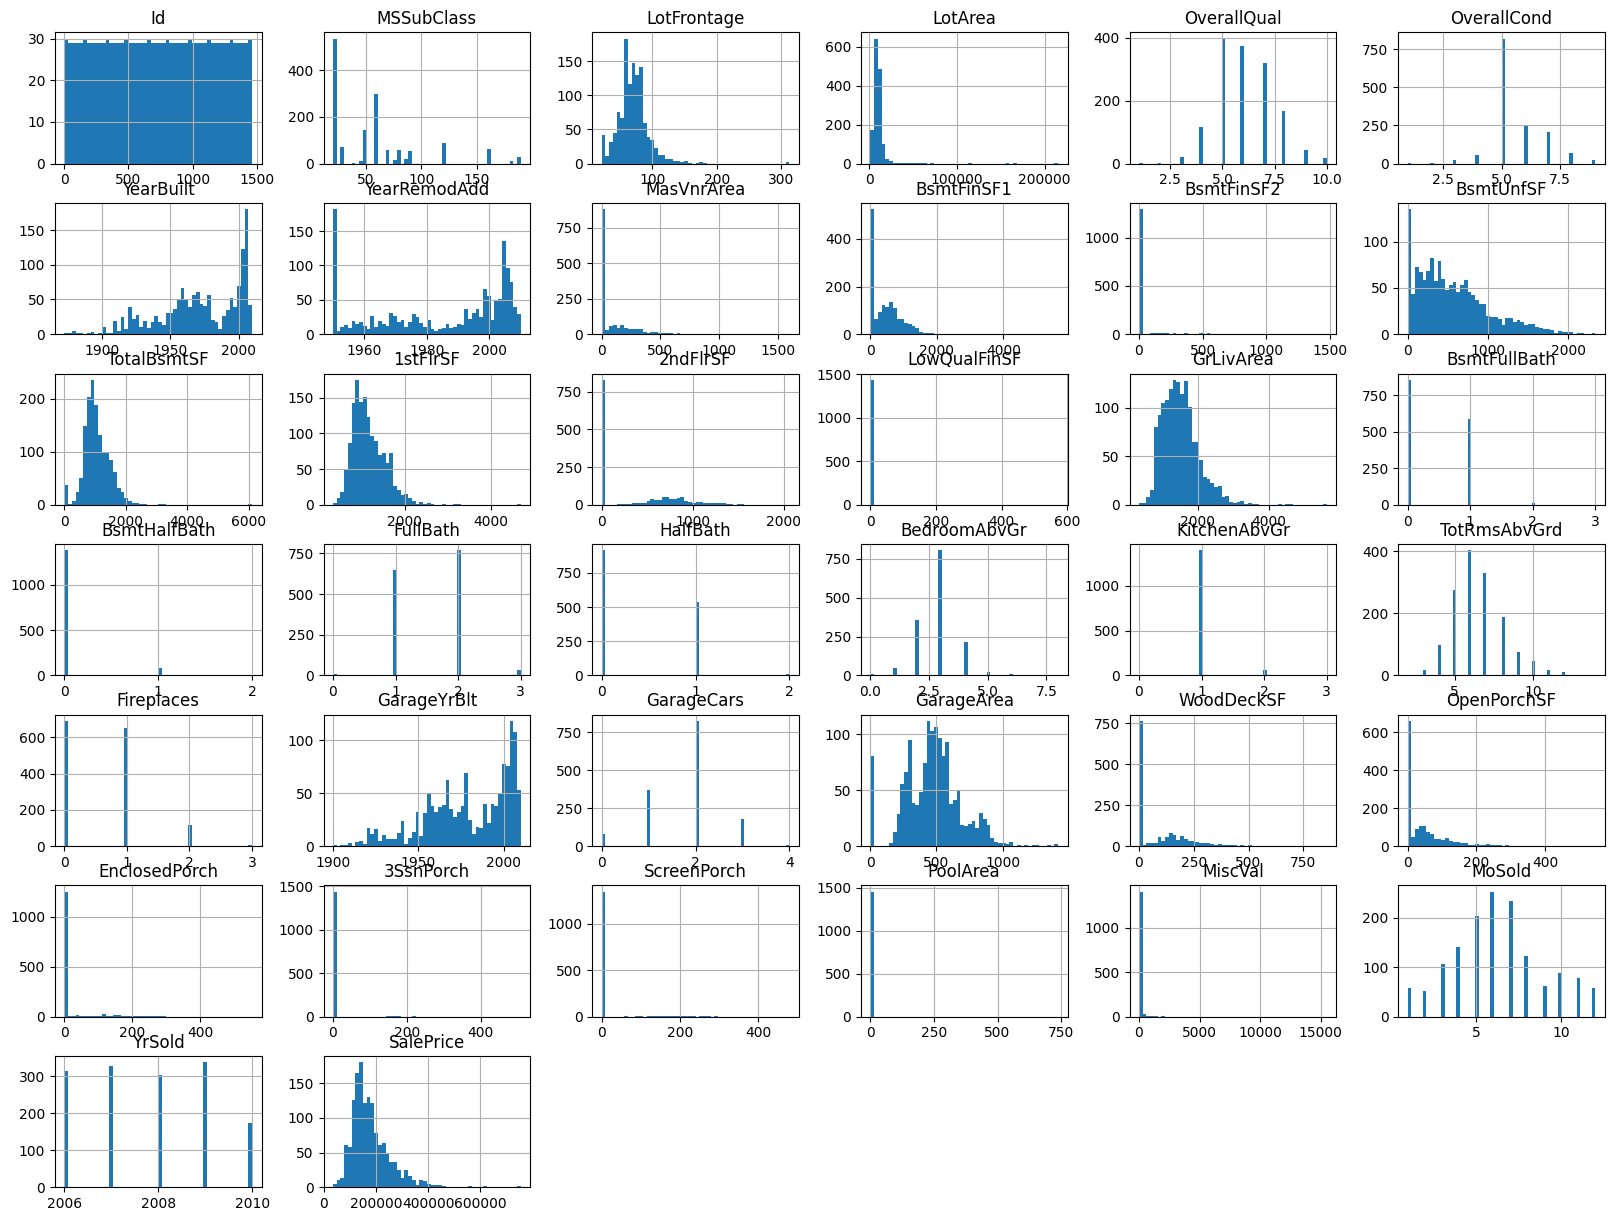

In [ ]:
%matplotlib inline
train_df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

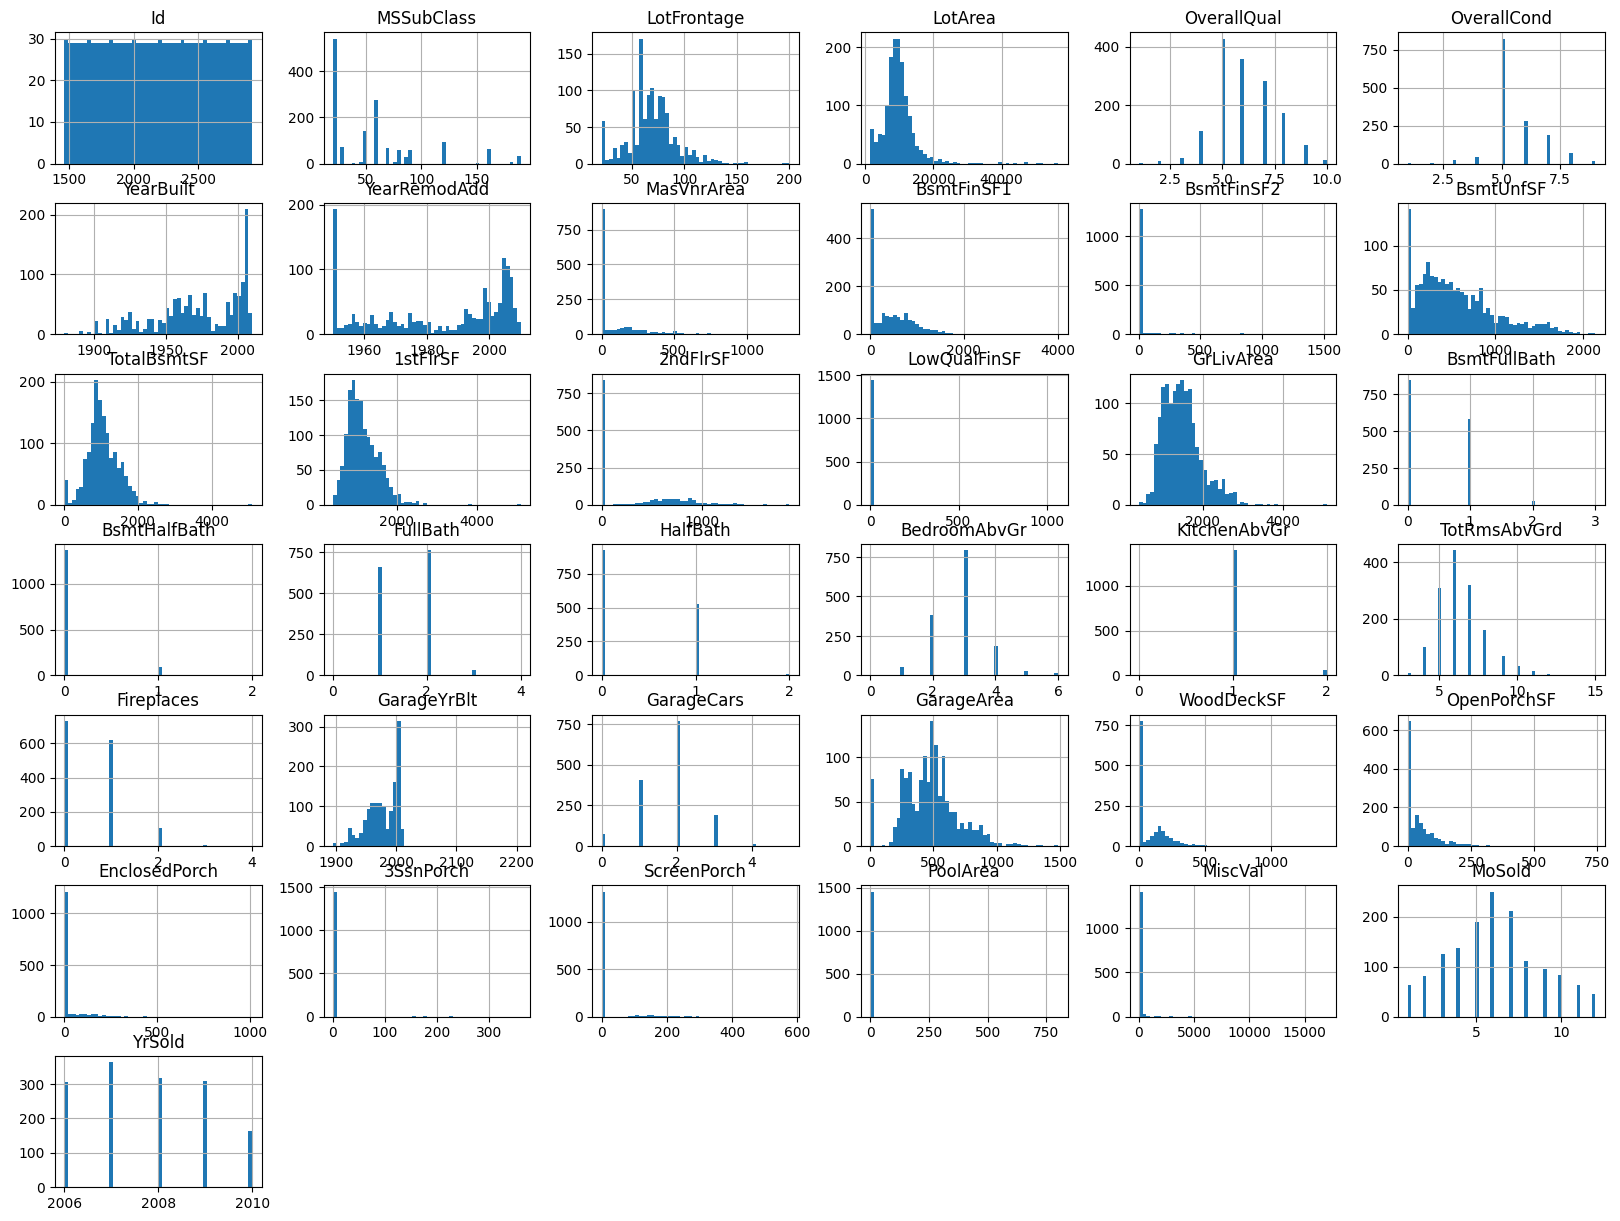

In [ ]:
import matplotlib.pyplot as plt
test_df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots.png")
plt.show()


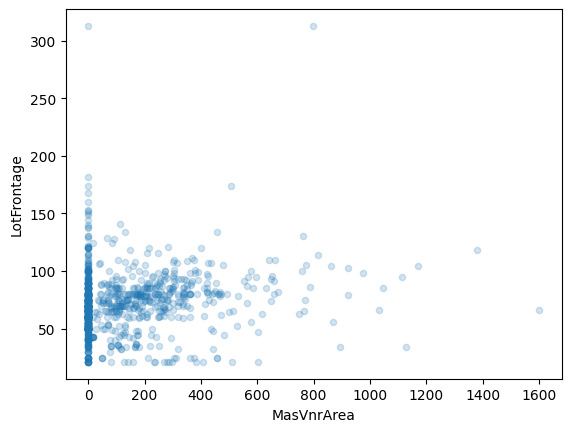

In [ ]:
train_df.plot(kind="scatter", x="MasVnrArea", y="LotFrontage", alpha=0.2)
plt.savefig('map1.png')

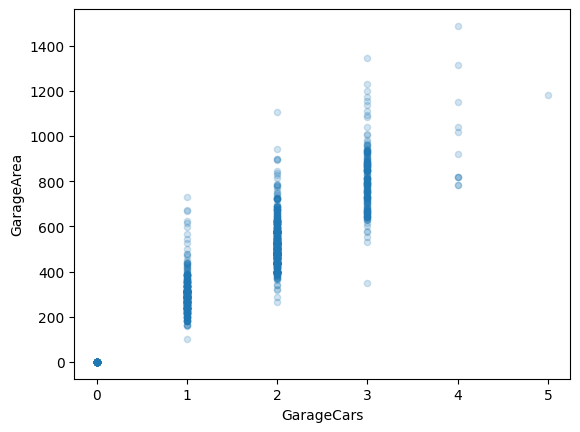

In [ ]:
test_df.plot(kind="scatter", x="GarageCars", y="GarageArea", alpha=0.2)
plt.savefig('map1.png')


<Axes: >

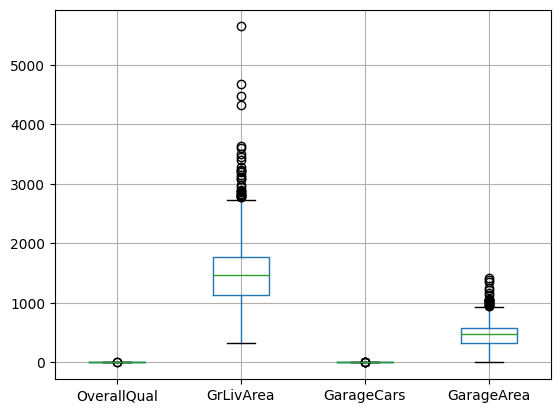

In [ ]:
train_df.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

<Axes: >

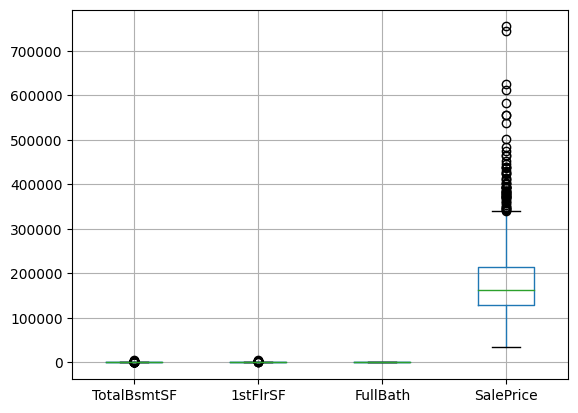

In [ ]:
train_df.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

In [ ]:
# Linear regression Model

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

train_df = train_df.select_dtypes(include=['number']).interpolate().dropna()
test_df = test_df.select_dtypes(include=['number']).interpolate().dropna()

x_training_data = train_df.drop(['SalePrice','Id'], axis=1)
y_training_data = np.log(train_df.SalePrice)


x_train, x_test, y_train, y_test = train_test_split(x_training_data,y_training_data,random_state = 21, test_size=0.2)


regression = LinearRegression()
regression.fit(x_train,y_train)

y_pred = regression.predict(x_test)


In [ ]:
print('Linear Regression R squared": %.4f' % regression.score(x_test, y_test))

Linear Regression R squared": 0.8493


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin = mean_squared_error(np.exp(y_pred), y_test)
lin_r = np.sqrt(lin)
print(lin_r)

195747.28015953413


In [ ]:
results = {"Predicted Prices":np.exp(y_pred),"Actual Prices":np.exp(y_test)}
df_val = pd.DataFrame(results)
df_val["Percentage Difference"] = round(abs((df_val["Predicted Prices"] - df_val["Actual Prices"]) / df_val["Actual Prices"]) * 100,2)
df_val


,Predicted Prices,Actual Prices,Percentage Difference
880,156677.762126,157000.0,0.21
605,229973.921577,205000.0,12.18
1166,245358.948864,245350.0,0.00
216,218109.586021,210000.0,3.86
970,86909.329260,135000.0,35.62
...,...,...,...
218,231419.797074,311500.0,25.71
1228,311321.804719,367294.0,15.24
1007,93234.996099,88000.0,5.95
575,109041.447359,118500.0,7.98
